# Pymaceuticals Inc.
---

### Analysis

- Seeing from the inital Statistical summary dataframe we can see that the drug regimen Capomulin had probably the most successful results with the lowest standard deviation. 
- From the line graph we can also see that Capomulin had a significant decrease in tumor volume after 20 days of treatment showing that it was an effective regimen treatment.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')

# Display the data table for preview

df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = df['Mouse ID'].nunique()

mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = df.loc[df['Mouse ID']== 'g989']
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df['Mouse ID']!= 'g989',:]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse = clean_df['Mouse ID'].nunique()

clean_mouse

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std_dev = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()


# Assemble the resulting series into a single summary DataFrame.

stat_summary_df = pd.DataFrame({'Mean Tumor Volume': mean,
                                'Median Tumor Volume': median,
                                'Tumor Volume Variance': variance,
                                'Tumor Volume Std. Dev.': std_dev,
                                'Tumor Volume Std. Err.': sem})

stat_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

stat_summary_agg = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median', 'var', 'std', 'sem'])
stat_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
regimen_count = clean_df['Mouse ID'].groupby(clean_df['Drug Regimen']).count()

regimen_count_sorted = regimen_count.sort_values(ascending=False)

regimen_count_sorted

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

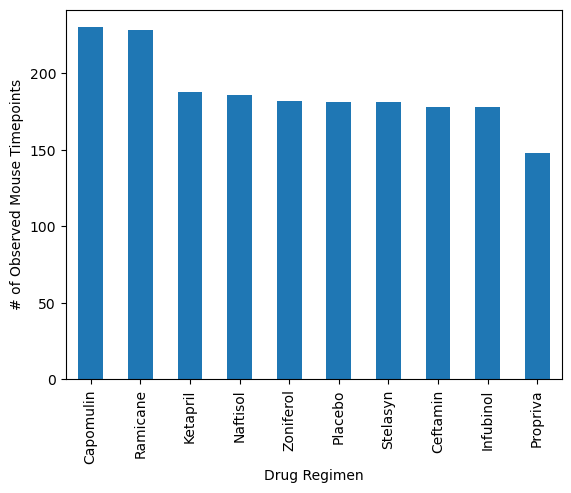

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

pandas_bar = regimen_count_sorted.plot(kind= 'bar')

plt.ylabel('# of Observed Mouse Timepoints')

pandas_bar

In [12]:
# From sorted series, place values into x and y variables for pyplot


In [11]:
y_values = regimen_count_sorted.to_list()
y_values

[230, 228, 188, 186, 182, 181, 181, 178, 178, 148]

In [12]:
x_values = regimen_count_sorted.index.values

x_values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype=object)

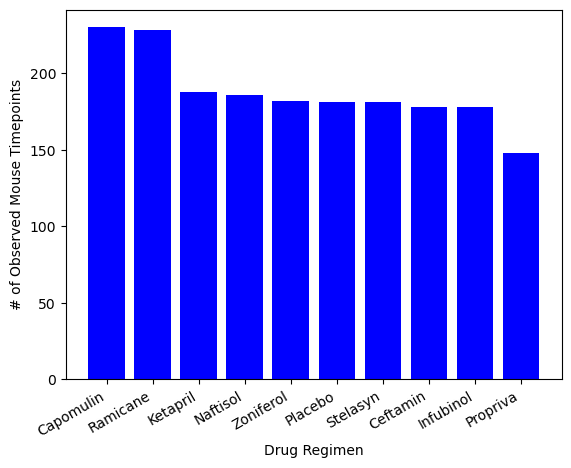

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(x_values,y_values, color = 'b', align= 'center')

plt.xlabel('Drug Regimen')
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=30, ha='right')

plt.show()

In [14]:
# Pull data needed for genders from clean_df
gender = clean_df['Sex'].value_counts()
gender

Sex
Male      958
Female    922
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

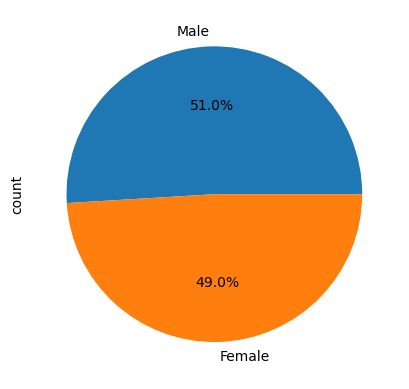

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender.plot.pie(autopct= '%1.1f%%')
plt.show

In [16]:
#Place gender values into list for pyplot pie chart

gender_values = gender.to_list()
gender_values

[958, 922]

In [17]:
#Take gender index into list for pyplot pie chart
genders= gender.index.values
genders

array(['Male', 'Female'], dtype=object)

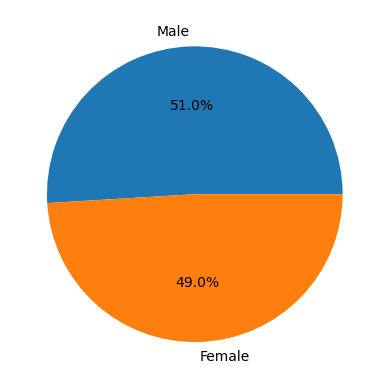

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_plot = plt.pie(gender_values, labels=genders, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create DataFrame with requested treatment regimens

treatment_regimens = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | 
                                    (clean_df["Drug Regimen"] == "Ramicane") |
                                    (clean_df["Drug Regimen"] == "Infubinol") |
                                    (clean_df["Drug Regimen"] == "Ceftamin"),
                                    ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)" ]]

treatment_regimens



,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1868,z581,Infubinol,25,54.316407
1869,z581,Infubinol,30,56.286750
1870,z581,Infubinol,35,58.628399
1871,z581,Infubinol,40,60.053740


In [20]:
# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = treatment_regimens.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max().reset_index()

greatest_timepoint

,Drug Regimen,Mouse ID,Timepoint
0,Capomulin,b128,45
1,Capomulin,b742,45
2,Capomulin,f966,20
3,Capomulin,g288,45
4,Capomulin,g316,45
...,...,...,...
95,Ramicane,s508,45
96,Ramicane,u196,45
97,Ramicane,w678,5
98,Ramicane,y449,15


In [21]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_df = greatest_timepoint.merge(clean_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']], on= ['Mouse ID', 'Timepoint'], how= 'left')

final_tumor_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for regimen in regimen_list:
    print(regimen)

Capomulin
Ramicane
Infubinol
Ceftamin


In [30]:

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


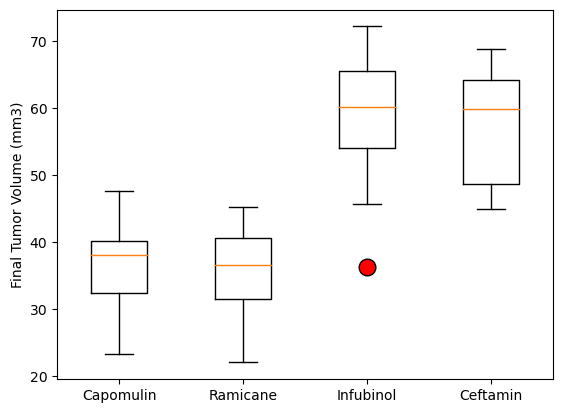

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [23]:
#Create Dataframe for Solo Mouse
capomulin_solo_mouse_df = clean_df.loc[(clean_df["Drug Regimen"] == 'Capomulin') & (clean_df["Mouse ID"] == 'l509'), :]
capomulin_solo_mouse_df
     

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


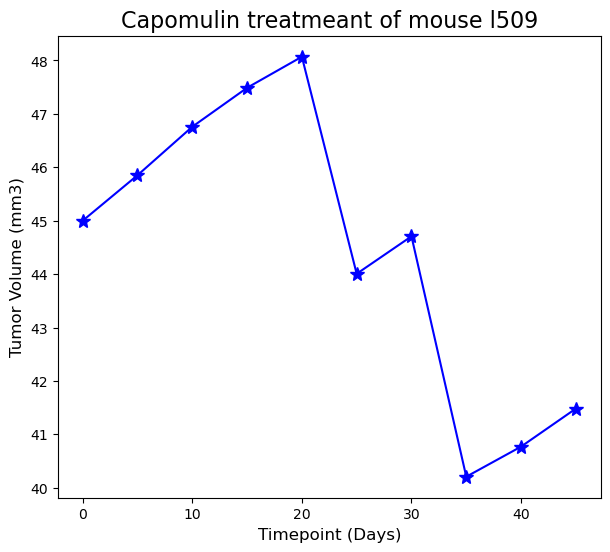

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_solo_mouse_df= capomulin_solo_mouse_df[["Mouse ID","Tumor Volume (mm3)", 'Timepoint' ]].reset_index(drop= True)
plt.figure(figsize=(7,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(capomulin_solo_mouse_df["Timepoint"], capomulin_solo_mouse_df["Tumor Volume (mm3)"], \
         marker='*', markersize = 10 ,color="blue")
plt.title('Capomulin treatmeant of mouse l509', size =16)
plt.xlabel('Timepoint (Days)', size =12)
plt.ylabel('Tumor Volume (mm3)', size =12)
plt.show()

In [25]:
#Create Dataframe for Capomulin regimen
capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == 'Capomulin') , :]

capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [26]:
#Pull weight values into list for scatter plot
mouse_weight = capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean()
mouse_weight_list = mouse_weight.to_list()

mouse_weight_list

[22.0,
 21.0,
 17.0,
 19.0,
 22.0,
 24.0,
 20.0,
 23.0,
 21.0,
 21.0,
 19.0,
 17.0,
 19.0,
 25.0,
 17.0,
 25.0,
 17.0,
 23.0,
 17.0,
 17.0,
 21.0,
 23.0,
 21.0,
 15.0,
 17.0]

In [27]:
#Pull Tumor Volume values for scatter plot
tumor_vol = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()

tumor_vol_list=tumor_vol.to_list()
tumor_vol_list

[41.963635634,
 40.083699304,
 36.50597276,
 41.990096605999994,
 44.613343895999996,
 44.805809685,
 39.14105275,
 44.465236345,
 43.21692460875,
 44.43447379,
 42.507261035,
 34.847469897,
 39.049816448,
 45.7989695075,
 36.509212046,
 43.367364453,
 34.559143395,
 42.803733044,
 39.328725099,
 39.887495191,
 41.581595101,
 41.38482521,
 41.352452281,
 36.182039562,
 38.506829248]

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

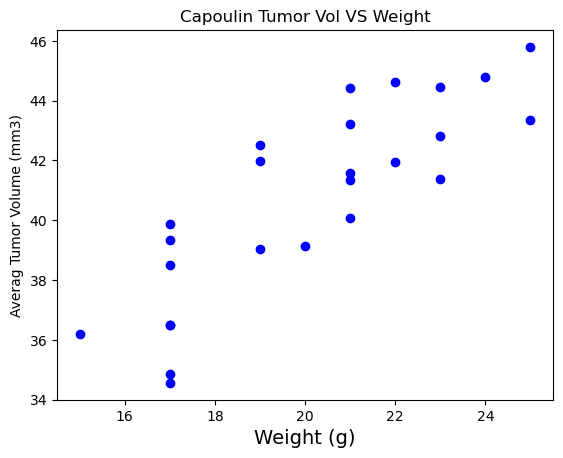

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(mouse_weight_list, tumor_vol_list, color="blue")
plt.title('Capoulin Tumor Vol VS Weight')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
r-squared is: 0.71


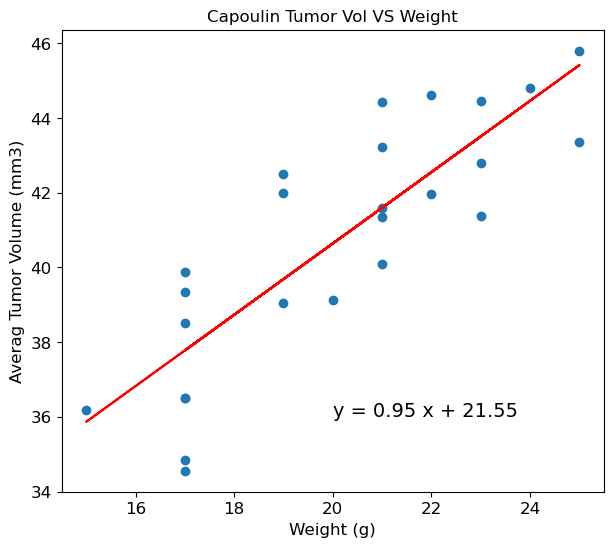

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(mouse_weight_list,tumor_vol_list)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


(slope, intercept,rvalue, pvalue, stderr)= linregress(mouse_weight_list, tumor_vol_list)
regress_values= np.array(mouse_weight_list) * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"r-squared is: {round(rvalue**2, 2)}")

plt.figure(figsize=(7,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.scatter(mouse_weight_list,tumor_vol_list)
plt.title('Capoulin Tumor Vol VS Weight')
plt.plot(mouse_weight_list, regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.ylabel('Averag Tumor Volume (mm3)', size =12)
plt.xlabel('Weight (g)', size =12)
plt.show()


